In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [3]:
df = pd.read_csv("./masked_kiva_loans.csv")

In [4]:
df.head()

,id,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date
0,1242201,500,500,Agriculture,Pakistan,245.0,14,14,female,monthly,2/20/2017
1,1165778,325,325,Agriculture,Philippines,145.0,14,13,female,irregular,10/11/2016
2,1123052,800,800,Agriculture,Ecuador,159.0,14,29,female,bullet,7/25/2016
3,1312344,425,425,Agriculture,Philippines,136.0,8,1,female,irregular,6/2/2017
4,861422,275,275,Agriculture,Kenya,133.0,12,11,female,monthly,3/25/2015


In [5]:
df.isna().sum()

id                      0
funded_amount           0
loan_amount             0
sector                  0
country                 0
partner_id            634
term_in_months          0
lender_count            0
borrower_genders      195
repayment_interval      0
date                    0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.drop('borrower_genders',axis=1,inplace=True)

In [8]:
df.head()

,id,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,repayment_interval,date
0,1242201,500,500,Agriculture,Pakistan,245.0,14,14,monthly,2/20/2017
1,1165778,325,325,Agriculture,Philippines,145.0,14,13,irregular,10/11/2016
2,1123052,800,800,Agriculture,Ecuador,159.0,14,29,bullet,7/25/2016
3,1312344,425,425,Agriculture,Philippines,136.0,8,1,irregular,6/2/2017
4,861422,275,275,Agriculture,Kenya,133.0,12,11,monthly,3/25/2015


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,32752.0,991874.026472,197540.852477,653049.0,819782.25,989522.0,1166197.0,1340239.0
funded_amount,32752.0,775.535082,1118.459703,0.0,250.00,450.0,900.0,50000.0
loan_amount,32752.0,818.514900,1142.462335,25.0,275.00,500.0,975.0,50000.0
partner_id,32752.0,177.667959,93.732585,9.0,126.00,145.0,204.0,533.0
term_in_months,32752.0,13.694736,8.477419,2.0,8.00,13.0,14.0,145.0
lender_count,32752.0,20.339888,27.919486,0.0,7.00,13.0,24.0,1481.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32752 entries, 0 to 33560
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  32752 non-null  int64  
 1   funded_amount       32752 non-null  int64  
 2   loan_amount         32752 non-null  int64  
 3   sector              32752 non-null  object 
 4   country             32752 non-null  object 
 5   partner_id          32752 non-null  float64
 6   term_in_months      32752 non-null  int64  
 7   lender_count        32752 non-null  int64  
 8   repayment_interval  32752 non-null  object 
 9   date                32752 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.7+ MB


In [11]:
num_fet = ['id','loan_amount', 'term_in_months', 'lender_count']
cat_fet = ['sector','country','borrower_genders','repayment_interval','date']

In [12]:
df['date'].head(10)

0     2/20/2017
1    10/11/2016
2     7/25/2016
3      6/2/2017
4     3/25/2015
5     3/31/2015
6     2/17/2016
7     3/28/2014
8      8/4/2014
9      8/6/2015
Name: date, dtype: object

In [13]:
df.head()

,id,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,repayment_interval,date
0,1242201,500,500,Agriculture,Pakistan,245.0,14,14,monthly,2/20/2017
1,1165778,325,325,Agriculture,Philippines,145.0,14,13,irregular,10/11/2016
2,1123052,800,800,Agriculture,Ecuador,159.0,14,29,bullet,7/25/2016
3,1312344,425,425,Agriculture,Philippines,136.0,8,1,irregular,6/2/2017
4,861422,275,275,Agriculture,Kenya,133.0,12,11,monthly,3/25/2015


In [14]:
import seaborn as sns

In [15]:
num_fet

['id', 'loan_amount', 'term_in_months', 'lender_count']

<Axes: xlabel='funded_amount', ylabel='loan_amount'>

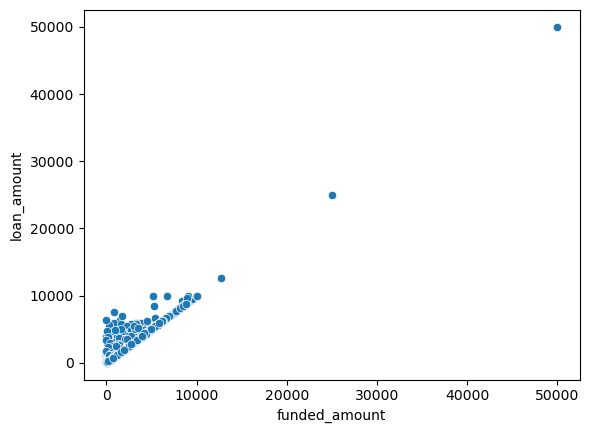

In [16]:
sns.scatterplot(data=df, x="funded_amount", y="loan_amount")

- there are outliers
- remove them

In [17]:
df = df[df['loan_amount'] <= 10000]

<Axes: xlabel='funded_amount', ylabel='loan_amount'>

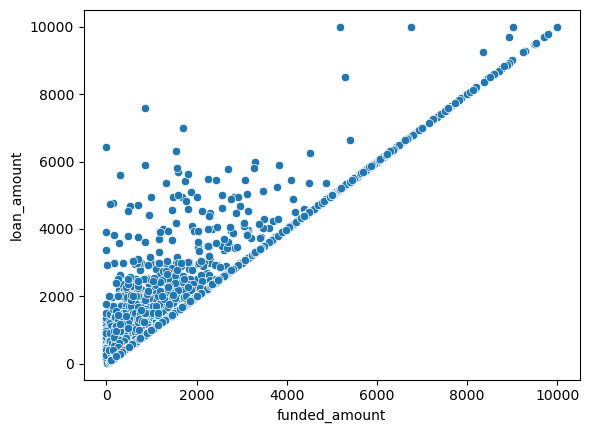

In [18]:
sns.scatterplot(data=df, x="funded_amount", y="loan_amount")

there are a direct relation between the funded amount and loan amount.<p>
where both in some sitiuation have the same value,<p>
and some way not<p>
and alwayes the loan amount is greater than the funded,<p>
where that is actully Logical becuase the loan amount is the basic of the loan,<p>
and the funded is the actully money that have been out from the bank direct to people<p>

<Axes: xlabel='lender_count', ylabel='funded_amount'>

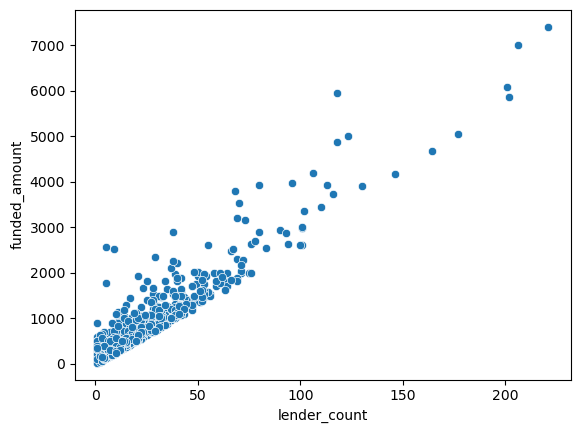

In [19]:
sns.scatterplot(x=df["lender_count"].head(1000), y=df["funded_amount"].head(1000))

a real direct relation ship when the lender in increase the amount of money funded is also increase<p>


In [20]:
cat_fet

['sector', 'country', 'borrower_genders', 'repayment_interval', 'date']

In [21]:
import seaborn.objects as so

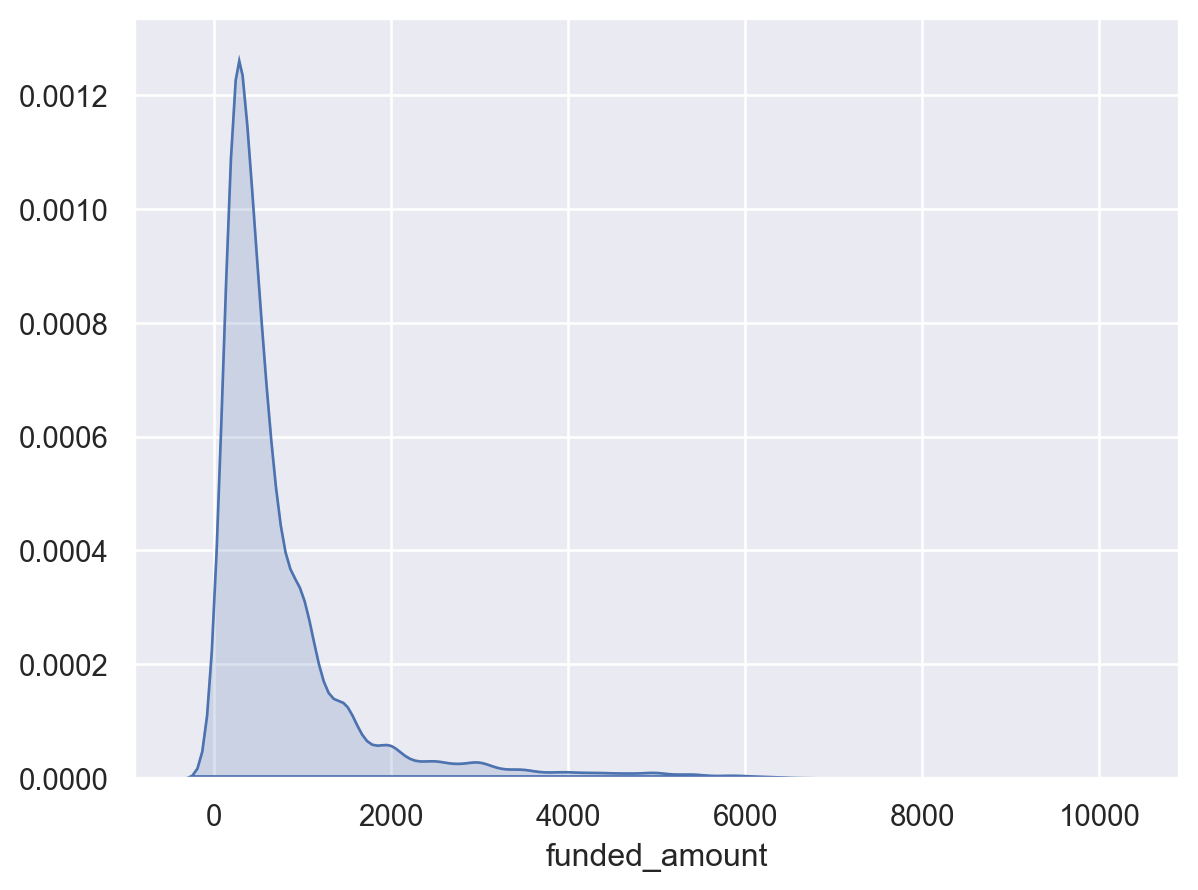

In [22]:
p = so.Plot(df, x="funded_amount")
p.add(so.Area(), so.KDE())

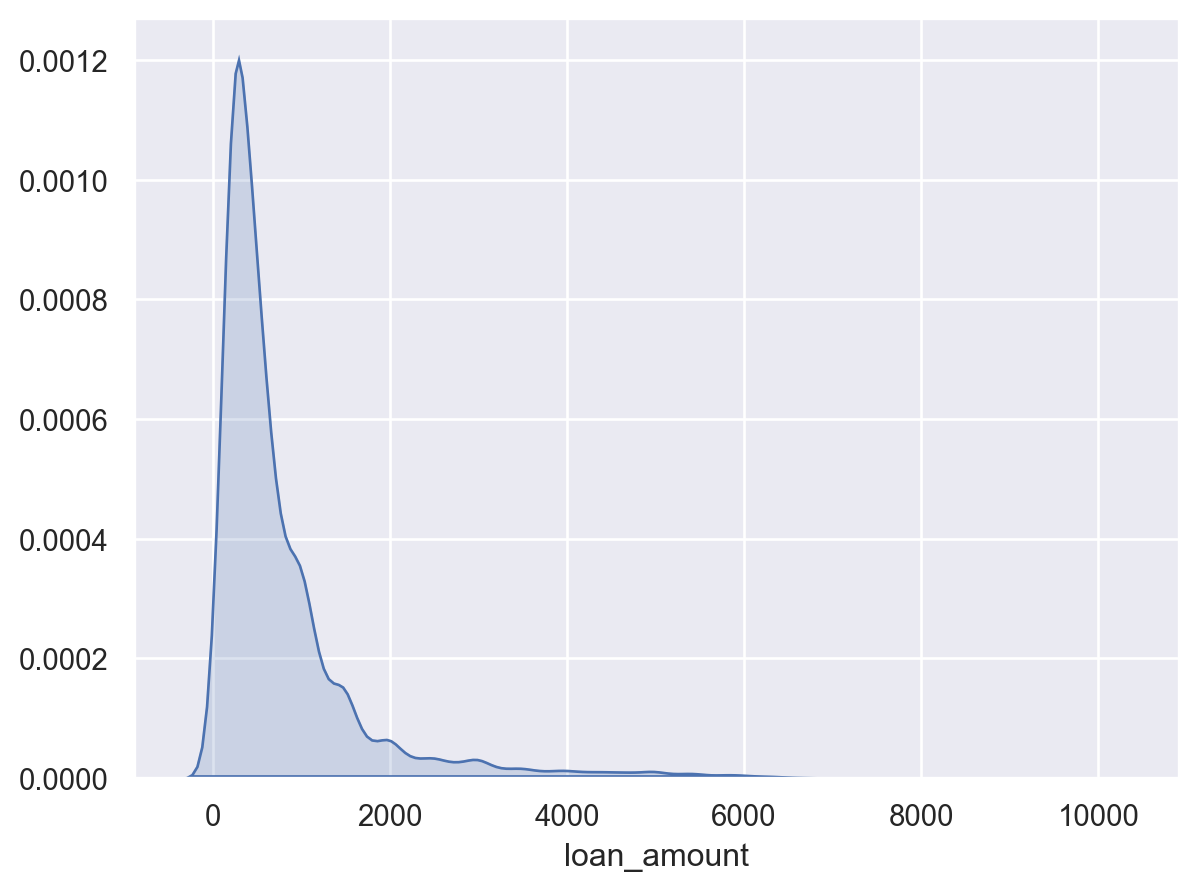

In [23]:
p = so.Plot(df, x="loan_amount")
p.add(so.Area(), so.KDE())

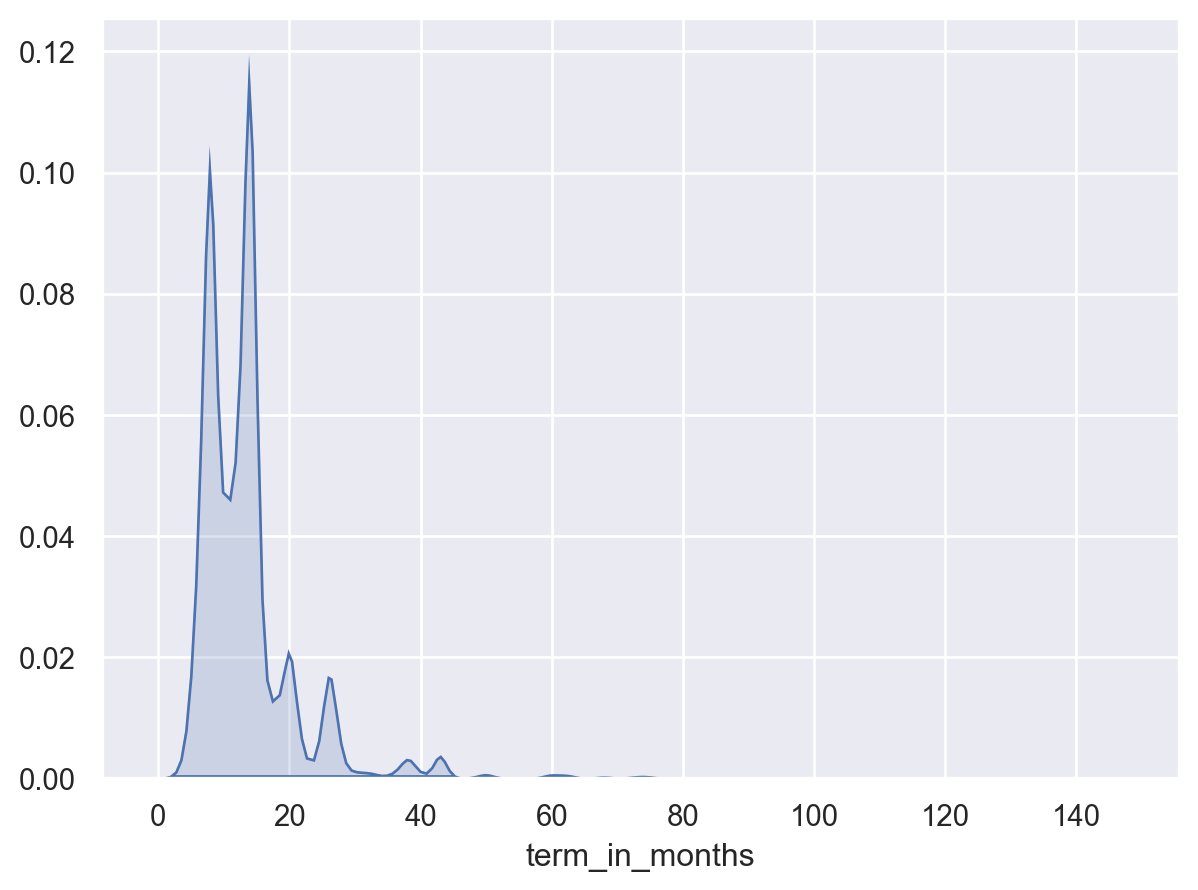

In [24]:
p = so.Plot(df, x="term_in_months")
p.add(so.Area(), so.KDE())

### most of data need to normalize

In [25]:
cat_fet

['sector', 'country', 'borrower_genders', 'repayment_interval', 'date']

<Axes: xlabel='country', ylabel='funded_amount'>

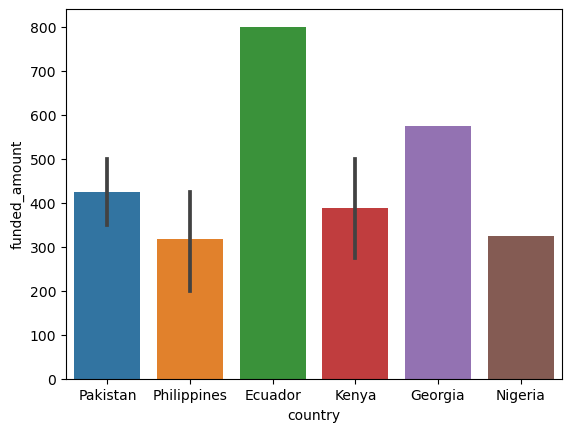

In [26]:
sns.barplot(df, x=df['country'].head(10), y="funded_amount")

In [27]:
df.groupby('country')['funded_amount'].sum().sort_values(ascending=False)

country
Philippines                         2749650
Paraguay                            1533250
Peru                                1507300
Kenya                               1483800
El Salvador                         1146450
                                     ...   
Nepal                                 10075
Chile                                  9025
Belize                                 6100
Saint Vincent and the Grenadines       2300
South Sudan                             850
Name: funded_amount, Length: 78, dtype: int64

In [28]:
import matplotlib.pyplot as plt

<Axes: xlabel='sector', ylabel='funded_amount'>

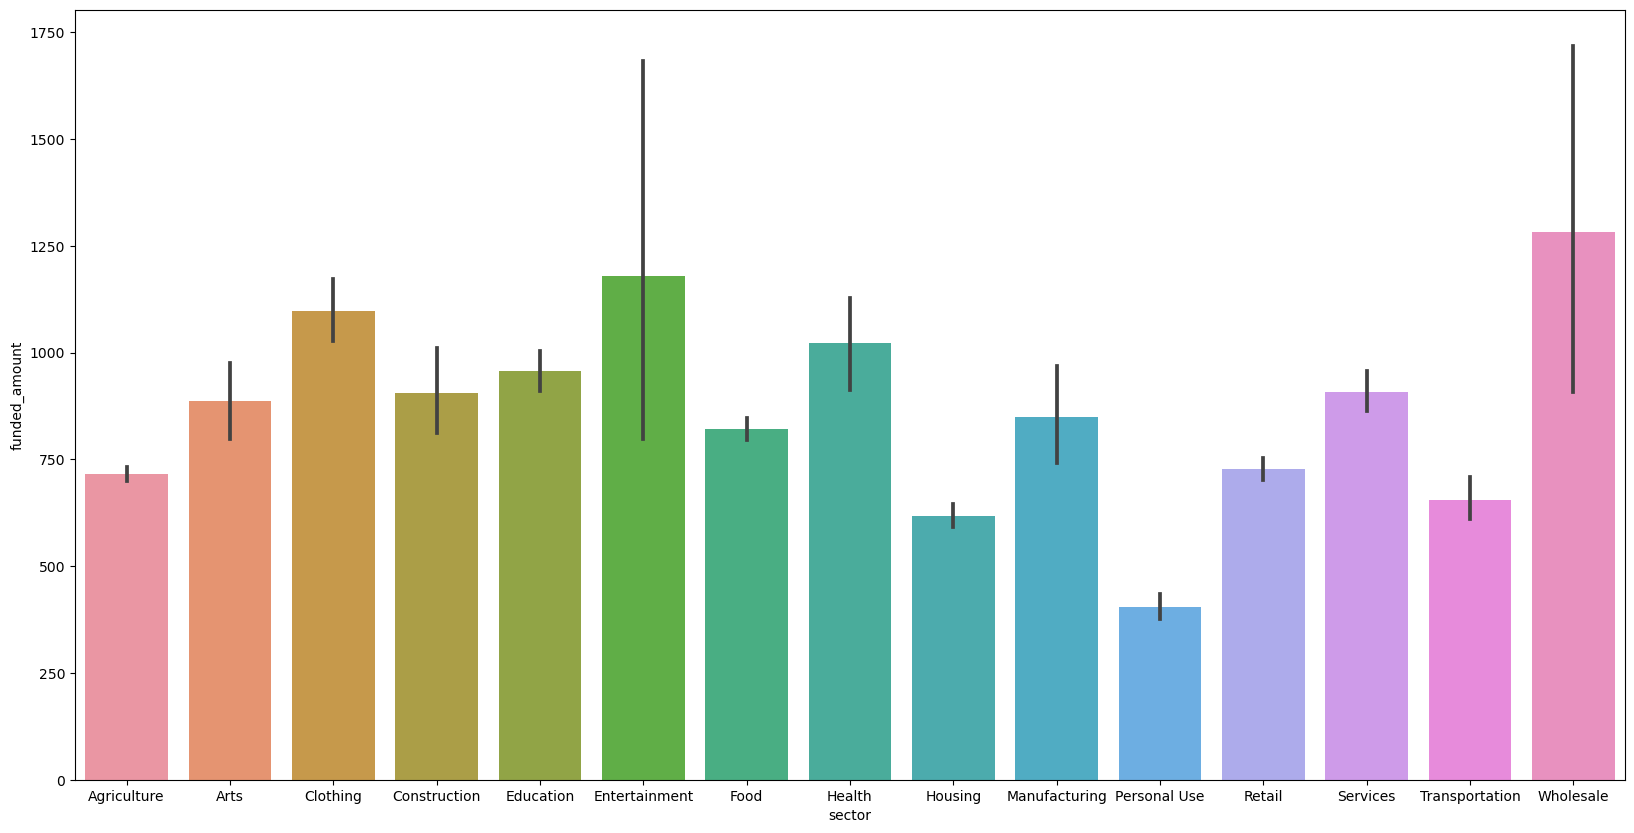

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(df, x=df['sector'], y="funded_amount")

<Axes: xlabel='repayment_interval', ylabel='funded_amount'>

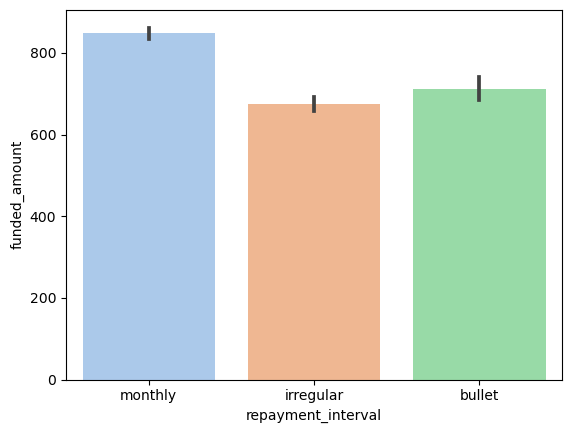

In [30]:
color = sns.color_palette("pastel")
sns.barplot(df, x="repayment_interval", y="funded_amount", palette=color)

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

funded ==>>> target

In [32]:
df.head()

,id,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,repayment_interval,date
0,1242201,500,500,Agriculture,Pakistan,245.0,14,14,monthly,2/20/2017
1,1165778,325,325,Agriculture,Philippines,145.0,14,13,irregular,10/11/2016
2,1123052,800,800,Agriculture,Ecuador,159.0,14,29,bullet,7/25/2016
3,1312344,425,425,Agriculture,Philippines,136.0,8,1,irregular,6/2/2017
4,861422,275,275,Agriculture,Kenya,133.0,12,11,monthly,3/25/2015


In [33]:
y = df['funded_amount']
x = df.drop(['funded_amount'],axis=1)

In [34]:
x.drop('date',axis=1,inplace=True)

In [35]:
x = pd.get_dummies(x,dtype=int)

In [36]:
x.head(1)

,id,loan_amount,partner_id,term_in_months,lender_count,sector_Agriculture,sector_Arts,sector_Clothing,sector_Construction,sector_Education,...,country_Uganda,country_Ukraine,country_United States,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe,repayment_interval_bullet,repayment_interval_irregular,repayment_interval_monthly
0,1242201,500,245.0,14,14,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
scaler = MinMaxScaler()

In [38]:
print(scaler.fit(x))

MinMaxScaler()


In [39]:
x = scaler.transform(x)

In [40]:
x

array([[0.85733494, 0.04761905, 0.45038168, ..., 0.        , 0.        ,
        1.        ],
       [0.74612407, 0.03007519, 0.25954198, ..., 0.        , 1.        ,
        0.        ],
       [0.68394913, 0.07769424, 0.28625954, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.25989901, 0.02005013, 0.78625954, ..., 0.        , 0.        ,
        1.        ],
       [0.38980631, 0.19799499, 0.13549618, ..., 0.        , 0.        ,
        1.        ],
       [0.40545701, 0.0726817 , 0.45419847, ..., 0.        , 1.        ,
        0.        ]])

In [41]:
lr = LinearRegression()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

In [43]:
reg = lr.fit(X_train,y_train)

reg.score(X_test,y_test)

0.9620830008786398

In [44]:
reg.score(X_train,y_train)


0.9559885258529501

In [45]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(X_train, y_train)
y_pred=RFR.predict(X_test)
r2_score(y_test,y_pred)


0.9726842629074338

In [46]:
from sklearn.tree import DecisionTreeRegressor
DTR= DecisionTreeRegressor(max_depth=5)
DTR.fit(X_train, y_train)
y_pred=DTR.predict(X_test)
r2_score(y_test,y_pred)

0.9504821654397173

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2, include_bias=False)
poly_feature=poly.fit_transform(x) # new features with higher degree (2)
x_train_poly,x_test_poly,y_train_poly,y_test_poly=train_test_split(poly_feature,y,test_size=0.3,random_state=0)

In [48]:
rgrr= LinearRegression()
rgrr.fit(x_train_poly,y_train_poly)
y_predict_poly=rgrr.predict(x_test_poly)
r2_score(y_test_poly,y_predict_poly)

-1.1531233556114861e+20

In [65]:
data = df[['date','funded_amount']]

In [66]:
data.head()

,date,funded_amount
0,2/20/2017,500
1,10/11/2016,325
2,7/25/2016,800
3,6/2/2017,425
4,3/25/2015,275


In [67]:
data['date'] = pd.to_datetime(data['date'])
df['date'] = pd.to_datetime(df['date'])

C:\Users\pc\AppData\Local\Temp\ipykernel_17664\2353675296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])


In [68]:
data.set_index('date',inplace=True)

In [69]:
data.head()

,funded_amount
date,
2017-02-20,500
2016-10-11,325
2016-07-25,800
2017-06-02,425
2015-03-25,275


In [115]:
date_year = pd.DataFrame()

In [116]:
date_year['year'] = df['date'].dt.to_period('M')

In [118]:
date_year['funded'] = df['funded_amount']

In [119]:
date_year.head()

,year,funded
0,2017-02,500
1,2016-10,325
2,2016-07,800
3,2017-06,425
4,2015-03,275


In [120]:
date_year.set_index('year',inplace=True)

In [139]:
date_year.sort_index(inplace=True)

In [140]:
date_year.index = date_year.index.to_timestamp()

AttributeError: 'DatetimeIndex' object has no attribute 'to_timestamp'

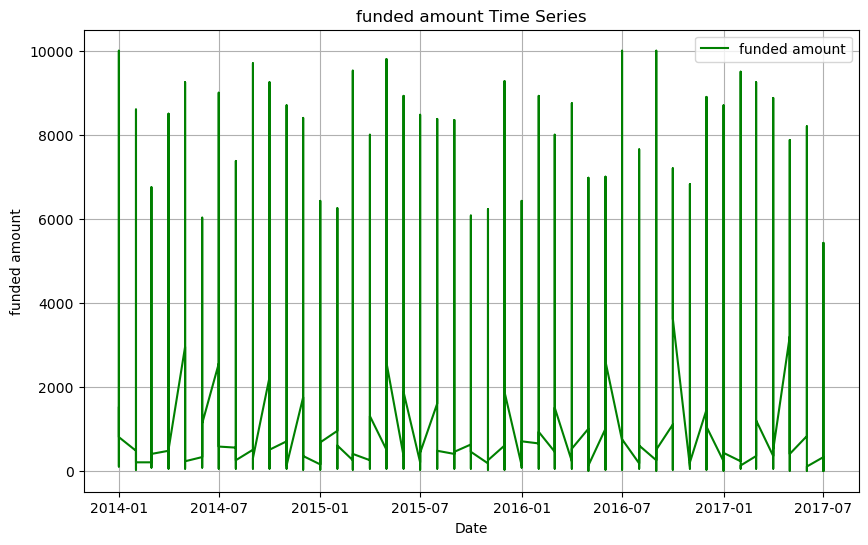

In [141]:
# Step 1: Visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(date_year.index, date_year['funded'], label='funded amount', color='green')
plt.title('funded amount Time Series')
plt.xlabel('Date')
plt.ylabel('funded amount')
plt.legend(loc='best')
plt.grid(True)
plt.show()

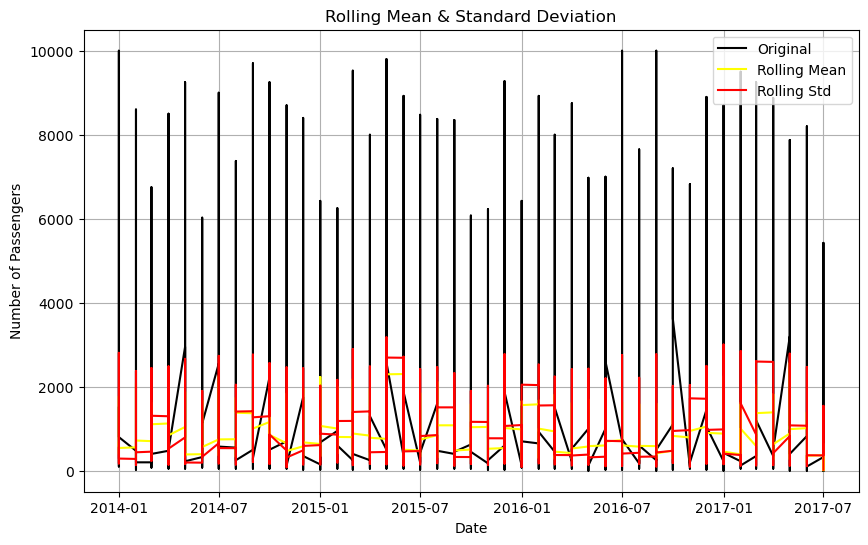

ADF Statistic: -22.062644902296054
p-value: 0.0
Critical Values:
	1%: -3.430549975945953
	5%: -2.8616283842309787
	10%: -2.5668170441823155


In [144]:
def stationarize_series(series):
    # Calculate rolling statistics
    rolling_mean = series.rolling(window=12).mean()
    rolling_std = series.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(series, label='Original', color='black')
    plt.plot(rolling_mean, label='Rolling Mean', color='yellow')
    plt.plot(rolling_std, label='Rolling Std', color='red')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Number of Passengers')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Perform Dickey-Fuller test
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

# Apply stationarize_series function
stationarize_series(date_year['funded'])


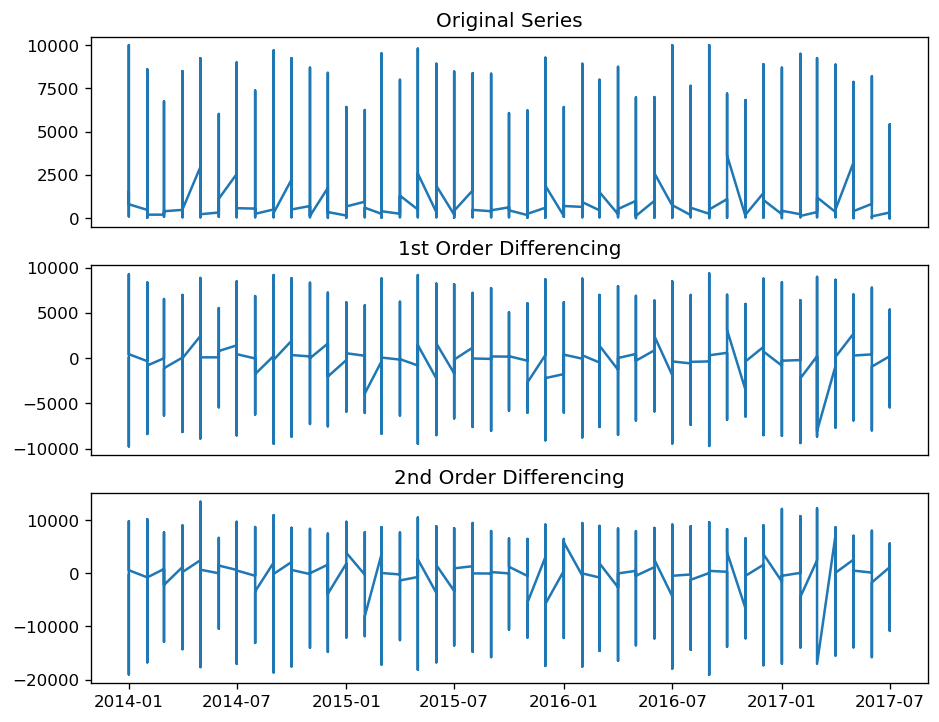

In [145]:
# Finding the value of the d parameter
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(date_year.funded); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(date_year.funded.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(date_year.funded.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

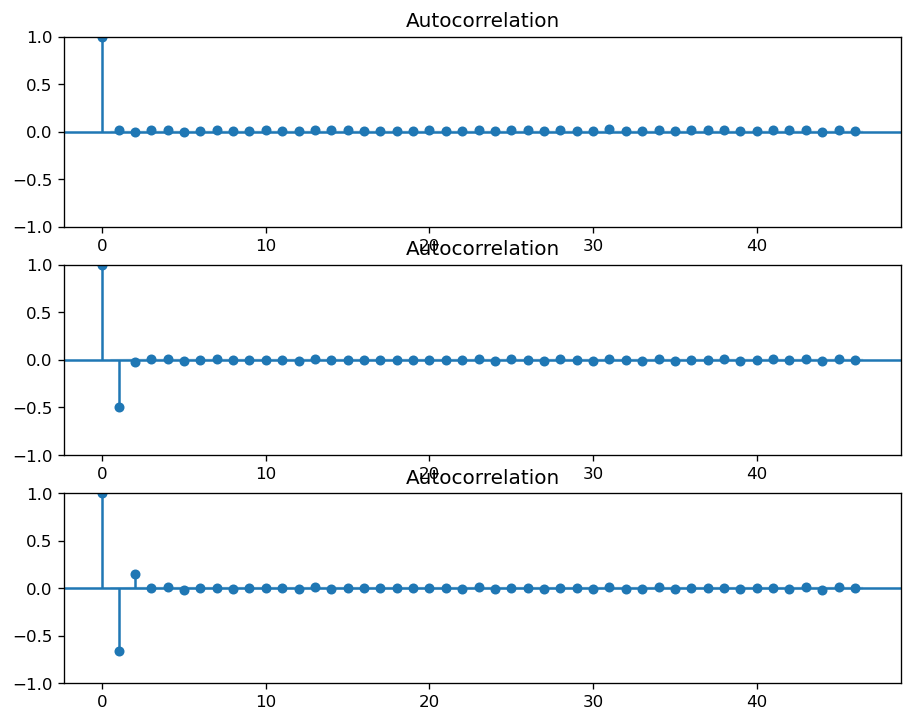

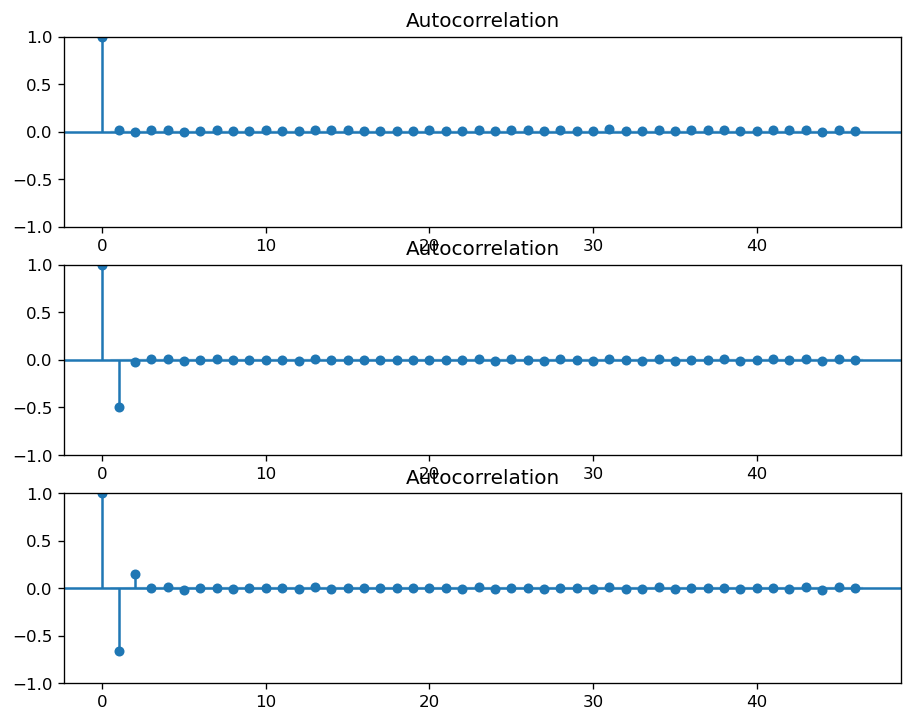

In [146]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(date_year.funded, ax=ax1)
plot_acf(date_year.funded.diff().dropna(), ax=ax2)
plot_acf(date_year.funded.diff().diff().dropna(), ax=ax3)

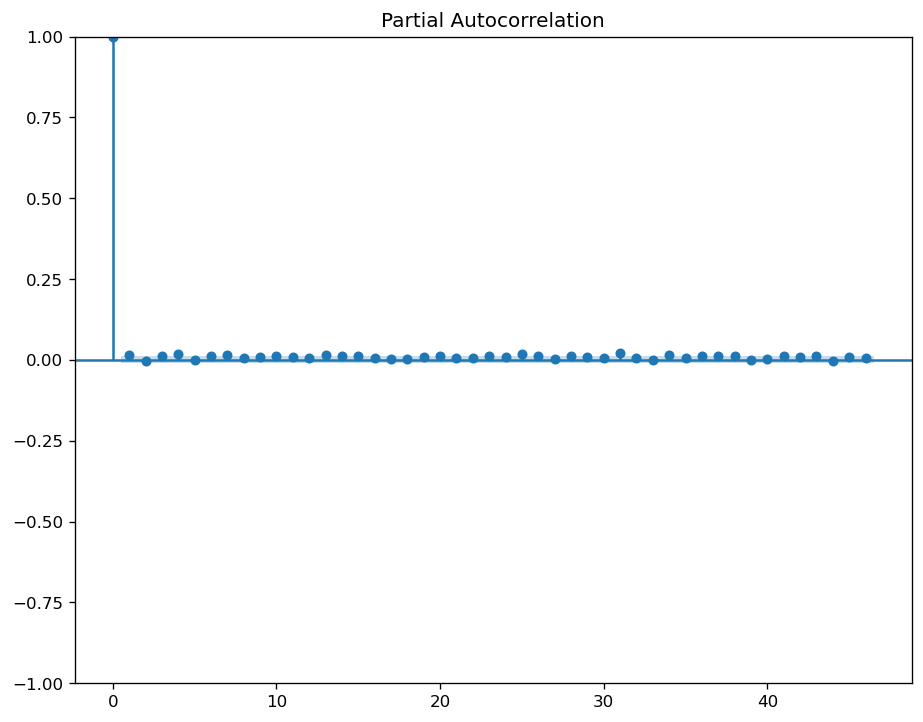

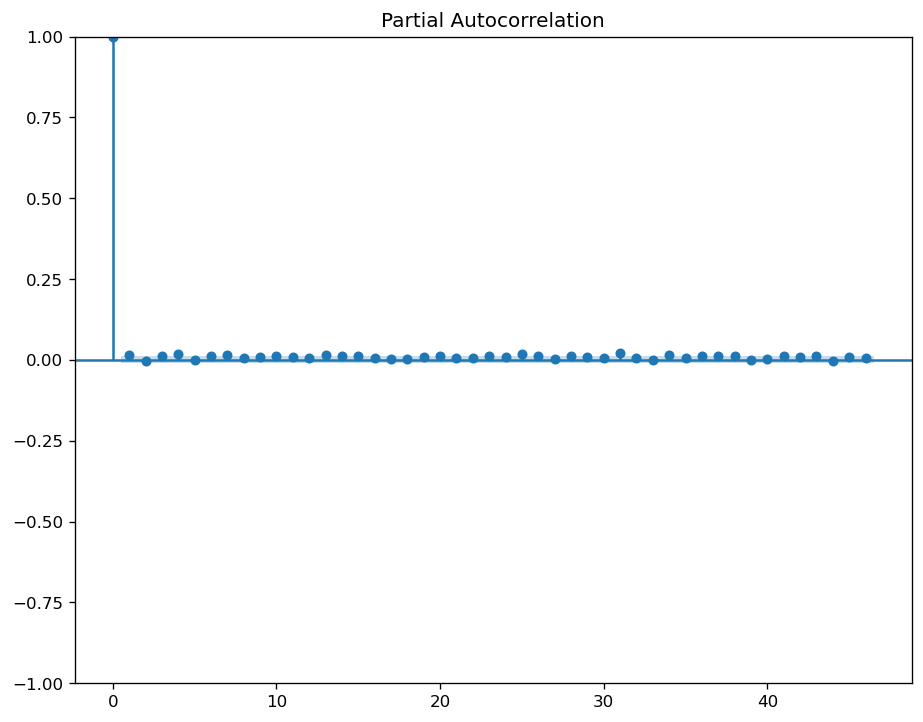

In [149]:

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(date_year.funded.dropna())

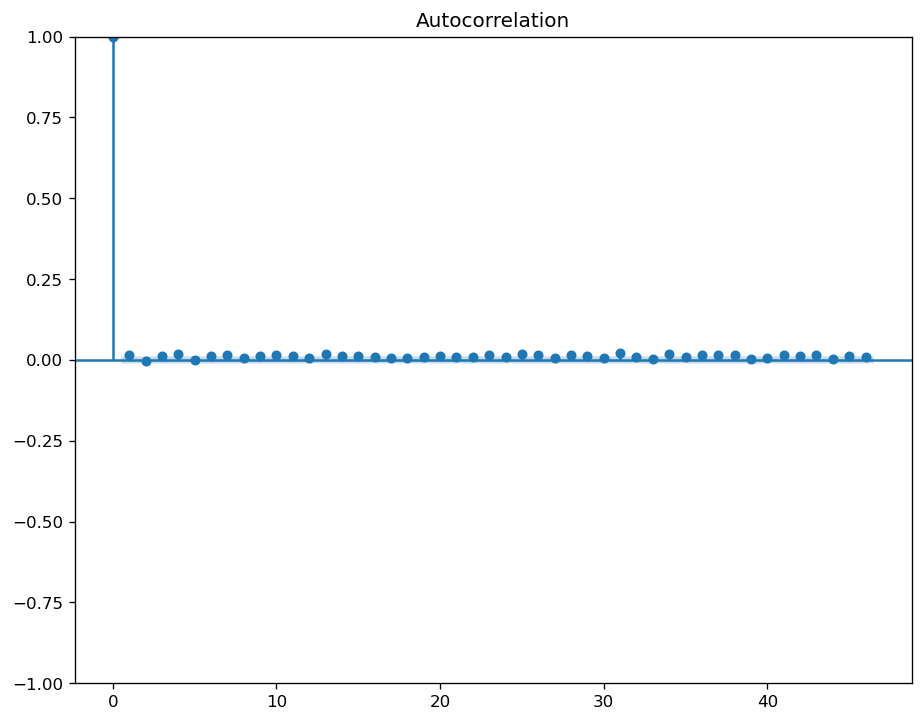

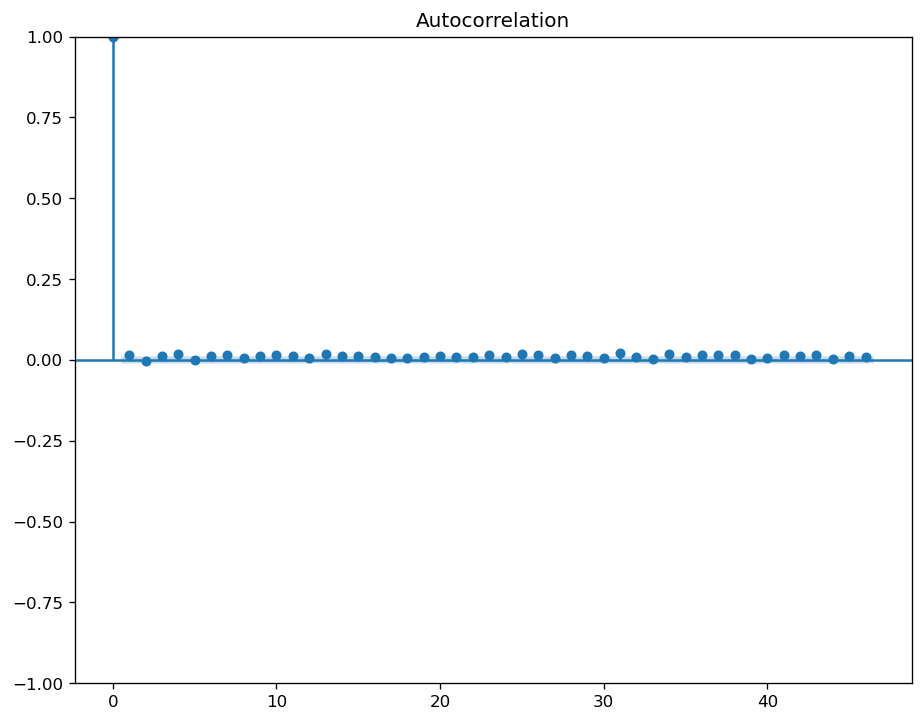

In [151]:
plot_acf(date_year.funded.dropna())

### p => 1, q => 1, d => 0 

In [ ]:
#                                      p d q
model = ARIMA(df['Passengers'], order=(1,0,1))
arima_model = model.fit()

# Step 5: Predict
forecast = arima_model.predict()
#forecast = arima_model.forecast()

